In [5]:
# libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set plot style
plt.style.use("seaborn-v0_8")

In [6]:
# loading data
try:
    # Assuming whitespace separated as per read.table default
    df = pd.read_csv("spotreba.txt", sep=r"\s+", header=None, names=["consumption"])
    spotreba = df["consumption"].values
    print("Data loaded successfully.")
except FileNotFoundError:
    print(
        "Error: 'spotreba.txt' not found. Please ensure the file is in the same directory."
    )
    # Fallback for demonstration if file is missing (optional, but good for robustness)
    spotreba = np.array([])

Data loaded successfully.


In [7]:
# calculations
if len(spotreba) > 0:
    # setting significance levels
    a = np.array([1 - i / 100 for i in range(1, 11)])

    # initializing results matrix
    clm = np.zeros((10, 2))

    # calculating interval estimates
    n = len(spotreba)
    mean_val = np.mean(spotreba)
    sem_val = stats.sem(spotreba)

    for i in range(10):
        ci = stats.t.interval(confidence=a[i], df=n - 1, loc=mean_val, scale=sem_val)
        clm[i, 0] = ci[0]
        clm[i, 1] = ci[1]

    print("Calculations complete.")
else:
    print("No data to process.")

Calculations complete.


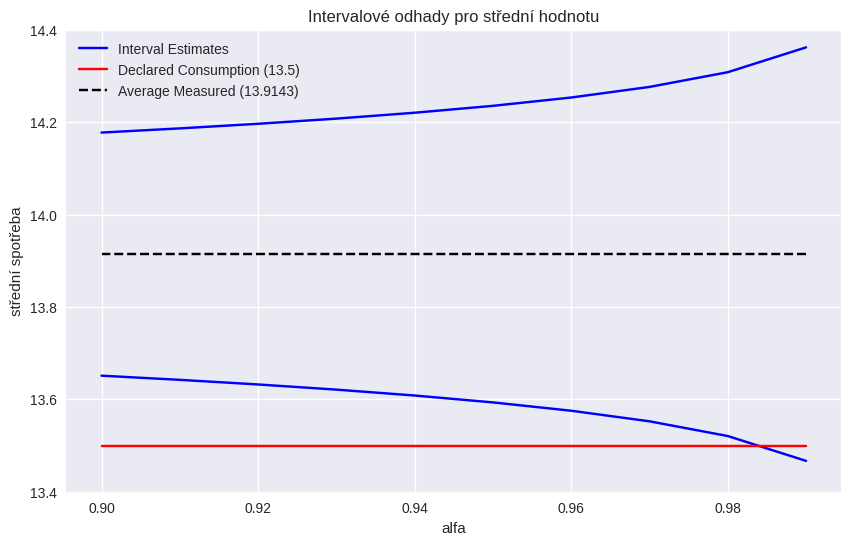

In [8]:
# visualization
if len(spotreba) > 0:
    plt.figure(figsize=(10, 6))

    # plotting interval estimates
    plt.plot(a, clm[:, 0], "b-", label="Interval Estimates")
    plt.plot(a, clm[:, 1], "b-")

    # declared consumption line
    d = np.full(10, 13.5)
    plt.plot(a, d, "r-", label="Declared Consumption (13.5)")

    # average measured consumption line
    m = np.full(10, mean_val)
    plt.plot(a, m, "k--", label=f"Average Measured ({mean_val:.4f})")

    plt.ylim(13.4, 14.4)
    plt.title("Intervalové odhady pro střední hodnotu")
    plt.xlabel("alfa")
    plt.ylabel("střední spotřeba")
    plt.legend()
    plt.grid(True)
    plt.show()